In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
color_pal = sns.color_palette()
import matplotlib.pyplot as plt
import xgboost as xgb

In [ ]:
df = pd.read_csv('household_power_consumption.csv')
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)
df = df.drop(columns=['Date', 'Time', 'Voltage', 'Global_reactive_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
df = df.set_index('DateTime')
df.to_csv("indexed_file.csv")

print(df)



                    Global_active_power Global_reactive_power
DateTime                                                     
2006-12-16 17:24:00               4.216                 0.418
2006-12-16 17:25:00                5.36                 0.436
2006-12-16 17:26:00               5.374                 0.498
2006-12-16 17:27:00               5.388                 0.502
2006-12-16 17:28:00               3.666                 0.528
...                                 ...                   ...
2008-12-13 21:34:00               0.426                 0.076
2008-12-13 21:35:00               0.424                 0.076
2008-12-13 21:36:00               0.422                 0.076
2008-12-13 21:37:00               0.422                 0.078
2008-12-13 21:38:00               0.422                 0.078

[1048575 rows x 2 columns]


<Axes: xlabel='DateTime'>

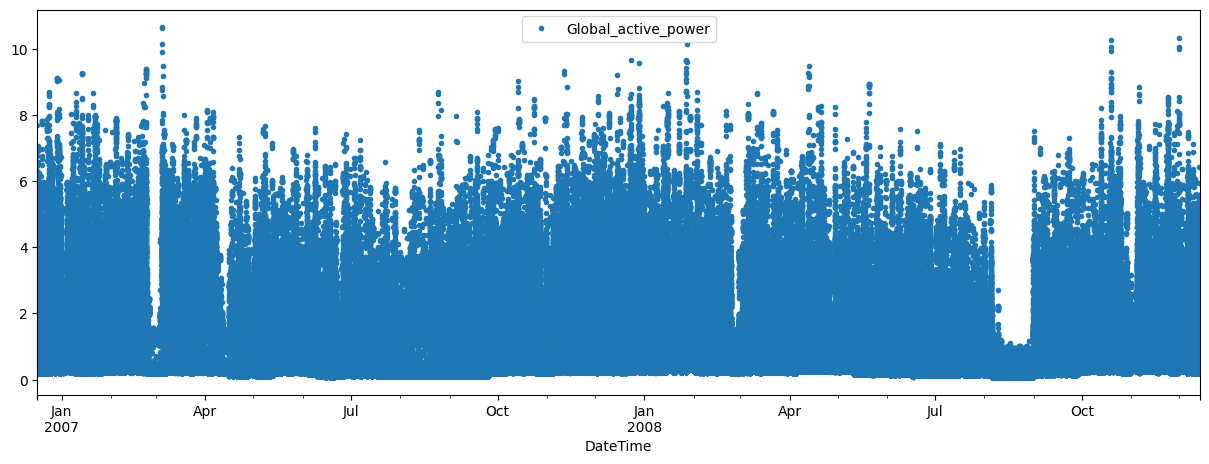

In [7]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.plot(style ='.', 
        figsize= (15, 5)
        )

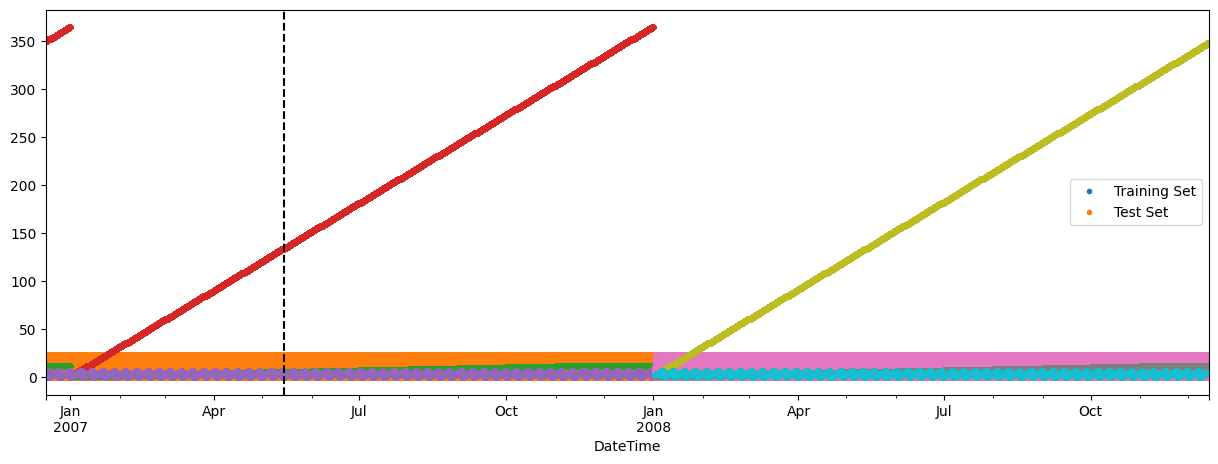

In [15]:
train = df.loc[df.index < '1-2-2008']
test = df.loc[df.index >= '1-2-2008']

fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax, style = '.', label = 'Training Set')
test.plot(ax=ax, style = '.', label = 'Test Set')
ax.axvline('5-15-2007', color = 'black', ls = '--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

<Axes: xlabel='DateTime'>

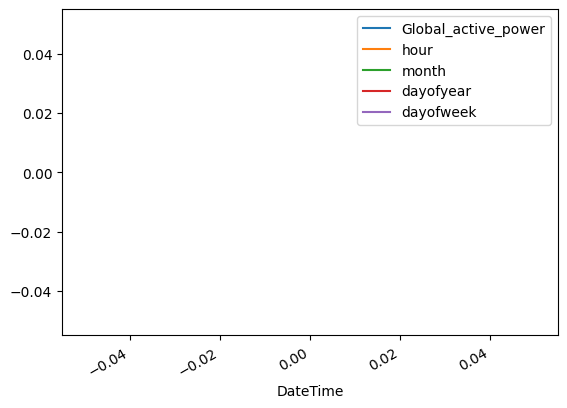

In [13]:
df.loc[(df.index > '1-2-2008') & (df.index < '1-2-2008')].plot()

In [10]:
df['hour'] = df.index.hour
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear
df['dayofweek'] = df.index.dayofweek

<Axes: xlabel='hour', ylabel='Global_active_power'>

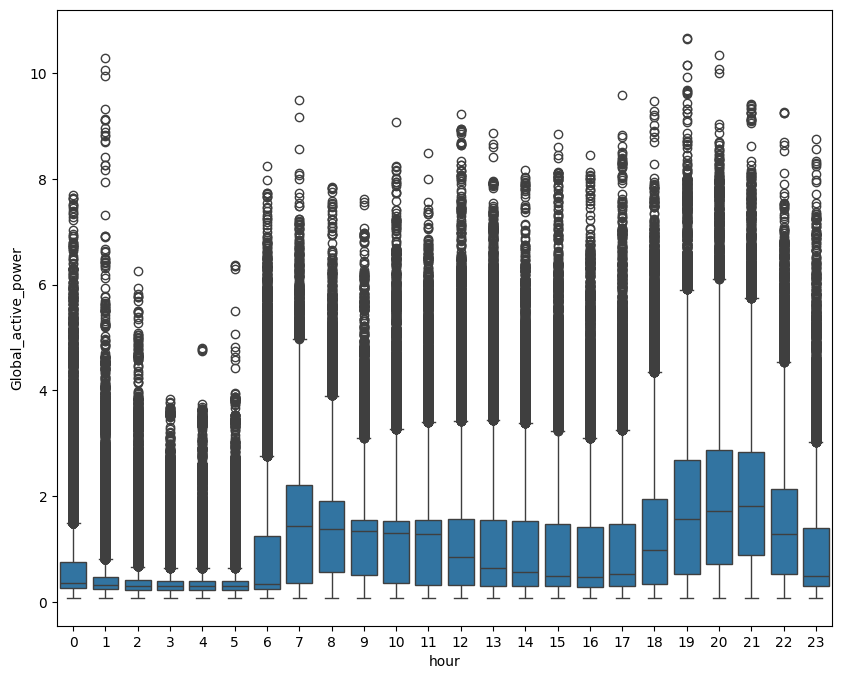

In [11]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x ='hour', y = 'Global_active_power')

<Axes: xlabel='month', ylabel='Global_active_power'>

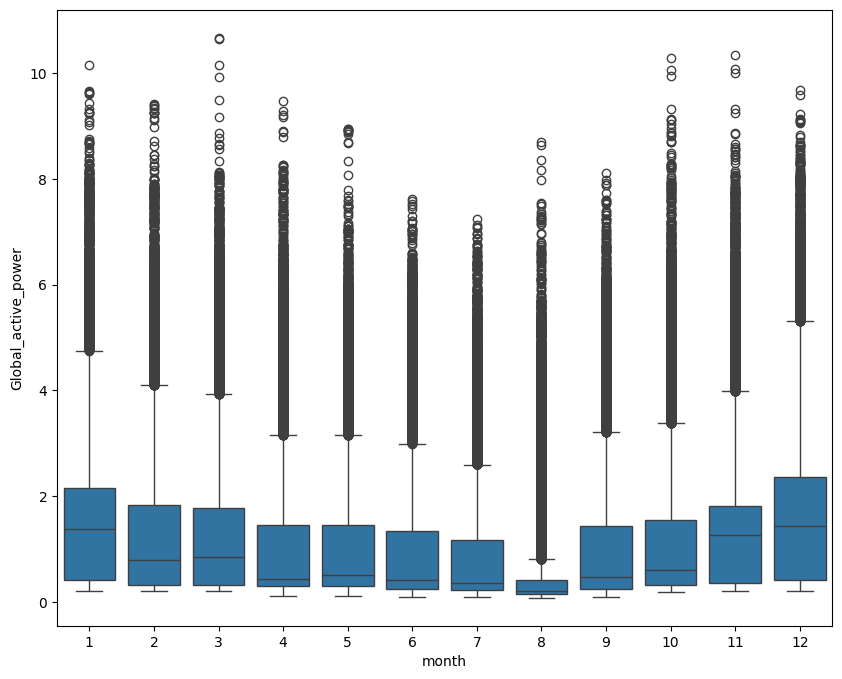

In [12]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x ='month', y = 'Global_active_power')